In [14]:
import sympy as sp

sp.Function("f")
x = sp.Symbol("x")

m = sp.Matrix([x, x**2])


def length(vec):
    return sp.sqrt(sum(v**2 for v in vec))


def normalize(vec):
    return vec / length(vec)


dm = sp.diff(m, x, 1)
dm = normalize(dm)

ddm = sp.diff(dm, x, 1)
length(ddm).simplify()

2*sqrt((4*x**2 + 1)**(-2))

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def circle(x, y, r):
    angles = np.linspace(0, 2 * np.pi, 20, endpoint=True)
    return np.array([x + r * np.cos(angles), y + r * np.sin(angles)])

In [31]:
normal(0).shape

(2, 1)

[1.23606798 2.11803399]
[0.4421574  1.27606249]
[0.06728348 0.71203632]
[0.         0.50183655]
[-0.06728348  0.71203632]
[-0.4421574   1.27606249]
[-1.23606798  2.11803399]


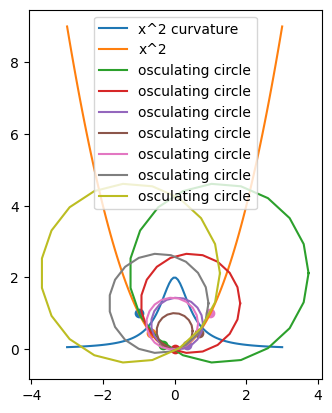

In [40]:
curvature = sp.lambdify("x", length(ddm).simplify(), "numpy")
normal = sp.lambdify("x", normalize(ddm), "numpy")

xs = np.linspace(-3, 3, 100)
ys = xs**2
cs = curvature(xs)
plt.plot(xs, cs, label="x^2 curvature")
plt.plot(xs, xs**2, label="x^2")

osx = np.linspace(-1, 1, 7)
rads = 1 / np.interp(osx, xs, cs)
for pos, rad in zip(osx, rads):
    p = normal(pos).reshape(2) * rad + np.array([pos, pos**2])
    print(p)
    circ = circle(p[0], p[1], rad)
    plt.plot(circ[0], circ[1], label="osculating circle")
    plt.scatter([pos], [pos * pos])
plt.gca().set_aspect("equal")
plt.legend()

array([[ 1.00000000e+00,  9.45817242e-01,  7.89140509e-01,
         5.46948158e-01,  2.45485487e-01, -8.25793455e-02,
        -4.01695425e-01, -6.77281572e-01, -8.79473751e-01,
        -9.86361303e-01, -9.86361303e-01, -8.79473751e-01,
        -6.77281572e-01, -4.01695425e-01, -8.25793455e-02,
         2.45485487e-01,  5.46948158e-01,  7.89140509e-01,
         9.45817242e-01,  1.00000000e+00],
       [ 0.00000000e+00,  3.24699469e-01,  6.14212713e-01,
         8.37166478e-01,  9.69400266e-01,  9.96584493e-01,
         9.15773327e-01,  7.35723911e-01,  4.75947393e-01,
         1.64594590e-01, -1.64594590e-01, -4.75947393e-01,
        -7.35723911e-01, -9.15773327e-01, -9.96584493e-01,
        -9.69400266e-01, -8.37166478e-01, -6.14212713e-01,
        -3.24699469e-01, -2.44929360e-16]])